In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import ssl
# This restores the same behavior as before.
ssl._create_default_https_context = ssl._create_unverified_context

print(torch.get_default_device())
torch.set_default_device('mps')

print(torch.get_default_device())

if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

cpu
mps:0
tensor([1.], device='mps:0')


In [2]:
batch_size = 64
num_class = 10
learning_rate = 0.001
num_epochs = 20

In [3]:
all_transforms = transforms.Compose([
    transforms.Resize((32,32)),\
    transforms.ToTensor(),
    transforms.Normalize(mean=0, std=1),
])

train_dataset = torchvision.datasets.CIFAR10(root='data2', train=True, 
                                             transform=all_transforms, 
                                             download=False)
test_dataset = torchvision.datasets.CIFAR10(root='data2', train=False, 
                                             transform=all_transforms, 
                                             download=False)

from torch.utils.data.dataloader import default_collate

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True, 
                                           generator=torch.Generator(device=mps_device),
                                           collate_fn=lambda x: tuple(x_.to(mps_device) for x_ in default_collate(x)), drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True, 
                                           generator=torch.Generator(device=mps_device),
                                           collate_fn=lambda x: tuple(x_.to(mps_device) for x_ in default_collate(x)), drop_last=True)

In [4]:
import skimage.data
# Reading the image
img = skimage.data.chelsea()
img = Image.fromarray(img)
img.save('chelseaPIL.png')


In [5]:
print(type(img))
img = all_transforms(img)
print(img.shape)


<class 'PIL.Image.Image'>
torch.Size([3, 32, 32])


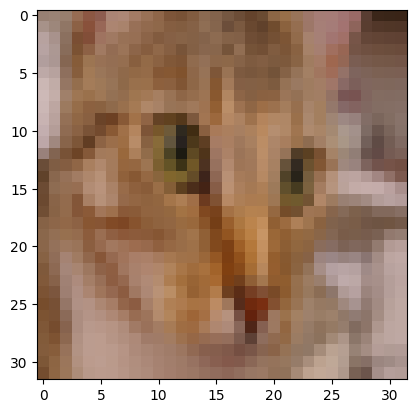

In [6]:
plt.imshow(img.permute(1,2,0))

In [7]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images.cpu(), nrow=16).permute(1, 2, 0))
        break

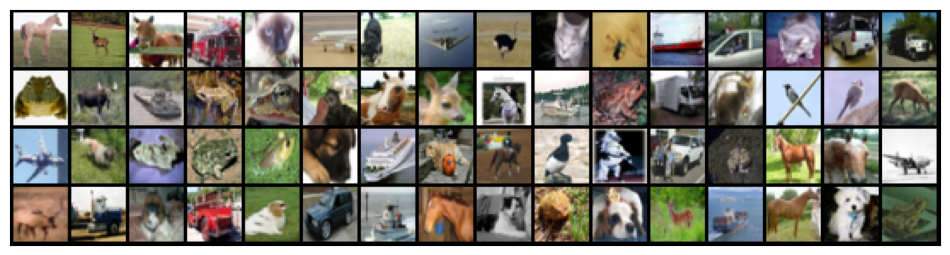

In [8]:
show_batch(train_loader)

#input: tensor of shape (minibatch, in_channels, iH, iW)
# minibatch = 64, in_channels = 3, iH=32, iW=32 (inputheight input weight)
#weight: filter of shape (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
#out=32, 3, 

for X_train_mini, y_train_mini in train_loader:
    imgset1 = X_train_mini
    break

print(imgset1.shape)




weights1 = torch.normal((32, 3, 3, 3), requires_grad=True)
bias1 = torch.normal((32), requires_grad=True)

#input: tensor of shape (minibatch, in_channels, iH, iW)
# minibatch = 64, in_channels = 32, iH=32, iW=32 (inputheight input weight)
#weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
#out = 64 in=32, 32, 32
#bias = outchannels
weights2 = torch.normal((64, 32, 3, 3), requires_grad=True)
bias2 = torch.normal((64), requires_grad=True)

#input: tensor of shape (minibatch, in_channels, iH, iW)
# minibatch = 64, in_channels = 32, iH=32, iW=32 (inputheight input weight)
#weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
#out = 128 in=64, 3, 3
#bias = outchannels = 128
weights3 = torch.normal((128, 64, 3, 3), requires_grad=True)
bias3 = torch.normal((128), requires_grad=True)

#input: tensor of shape (minibatch, in_channels, iH, iW)
# minibatch = 64, in_channels = 128, iH=16, iW=16 (inputheight input weight)
#weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
#out = 256 in=128, 3, 3
#bias = outchannels = 256
weights4 = torch.normal((128, 128, 3, 3), requires_grad=True)
bias4 = torch.normal((128), requires_grad=True)

#input: tensor of shape (minibatch, in_channels, iH, iW)
# minibatch = 64, in_channels = 128, iH=16, iW=16 (inputheight input weight)
#weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
#out = 256 in=128, 3, 3
#bias = outchannels = 256
weights5 = torch.normal((256, 128, 3, 3), requires_grad=True)
bias5 = torch.normal((256), requires_grad=True)

#input: tensor of shape (minibatch, in_channels, iH, iW)
# minibatch = 64, in_channels = 128, iH=16, iW=16 (inputheight input weight)
#weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
#out = 256 in=128, 3, 3
#bias = outchannels = 256
weights6 = torch.normal((256, 256, 3, 3), requires_grad=True)
bias6 = torch.normal((256), requires_grad=True)

#weights = out_feature, in_features
#bias = out features
weights7 = torch.normal((1024,4096), requires_grad=True)
bias7 = torch.normal((1024), requires_grad=True)

weights8 = torch.normal((512, 1024), requires_grad=True)
bias8 = torch.normal((512), requires_grad=True)

weights9 = torch.normal((10, 512), requires_grad=True)
bias9 = torch.normal((10), requires_grad=True)



l1_feature_map = torch.nn.functional.conv2d(input=imgset1, weight=weights1, bias=bias1, padding=1, groups=1)
l1_feature_relu = torch.nn.functional.relu(l1_feature_map)

print(l1_feature_relu.shape)
l2_feature_map = torch.nn.functional.conv2d(input=l1_feature_map, weight=weights2, bias=bias2, padding=1, groups=1)
l2_feature_relu = torch.nn.functional.relu(l2_feature_map)

print(l2_feature_relu.shape)
pool1 = torch.nn.functional.max_pool2d(l2_feature_relu, kernel_size=(2,2))
print(pool1.shape)
l3_feature_map = torch.nn.functional.conv2d(input=pool1, weight=weights3, bias=bias3, padding=1, groups=1)
l3_feature_relu = torch.nn.functional.relu(l3_feature_map)

print(l3_feature_relu.shape)
l4_feature_map = torch.nn.functional.conv2d(input=l3_feature_relu, weight=weights4, bias=bias4, padding=1, groups=1)
l4_feature_relu = torch.nn.functional.relu(l4_feature_map)

print(l4_feature_relu.shape)
pool2 = torch.nn.functional.max_pool2d(l4_feature_relu, kernel_size=(2,2))
print(pool2.shape)
l5_feature_map = torch.nn.functional.conv2d(input=pool2, weight=weights5, bias=bias5, padding=1, groups=1)
l5_feature_relu = torch.nn.functional.relu(l5_feature_map)

print(l5_feature_relu.shape)
l6_feature_map = torch.nn.functional.conv2d(input=l5_feature_relu, weight=weights6, bias=bias6, padding=1, groups=1)
l6_feature_relu = torch.nn.functional.relu(l6_feature_map)

print(l6_feature_relu.shape)
pool3 = torch.nn.functional.max_pool2d(l6_feature_relu, kernel_size=(2,2))
print(pool3.shape)
f = torch.flatten(pool3,start_dim=1)
print(f.shape)
#torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
#nn.Linear(64*256*4*4, 1024)
lin1 = torch.nn.functional.linear(input=f, weight=weights7, bias=bias7)
lin1_relu = torch.nn.functional.relu(lin1)
print(lin1_relu.shape)
lin2 = torch.nn.functional.linear(input=lin1_relu, weight=weights8, bias=bias8)
lin2_relu = torch.nn.functional.relu(lin2)
print(lin2.shape)
lin3 = torch.nn.functional.linear(input=lin2_relu, weight=weights9, bias=bias9)
pred = torch.nn.functional.softmax(lin3, dim=1)
print(pred)


In [9]:
class Net():
    def __init__(self, num_classes=10):
        super().__init__()
        #input: tensor of shape (minibatch, in_channels, iH, iW)
        # minibatch = 64, in_channels = 3, iH=32, iW=32 (inputheight input weight)
        #weight: filter of shape (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
        #out=32, 3, 
        self.weights1 = torch.nn.init.kaiming_normal_(torch.empty((32, 3, 3, 3), requires_grad=True))
        self.bias1 = torch.zeros((32), requires_grad=True)
        #input: tensor of shape (minibatch, in_channels, iH, iW)
        # minibatch = 64, in_channels = 32, iH=32, iW=32 (inputheight input weight)
        #weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
        #out = 64 in=32, 32, 32
        #bias = outchannels
        self.weights2 = torch.nn.init.kaiming_normal_(torch.empty((64, 32, 3, 3), requires_grad=True))
        self.bias2 = torch.zeros((64), requires_grad=True)
        #input: tensor of shape (minibatch, in_channels, iH, iW)
        # minibatch = 64, in_channels = 32, iH=32, iW=32 (inputheight input weight)
        #weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
        #out = 128 in=64, 3, 3
        #bias = outchannels = 128
        self.weights3 = torch.nn.init.kaiming_normal_(torch.empty((128, 64, 3, 3), requires_grad=True))
        self.bias3 = torch.zeros((128), requires_grad=True)
        #input: tensor of shape (minibatch, in_channels, iH, iW)
        # minibatch = 64, in_channels = 128, iH=16, iW=16 (inputheight input weight)
        #weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
        #out = 256 in=128, 3, 3
        #bias = outchannels = 256
        self.weights4 = torch.nn.init.kaiming_normal_(torch.empty((128, 128, 3, 3), requires_grad=True))
        self.bias4 = torch.zeros((128), requires_grad=True)
        #input: tensor of shape (minibatch, in_channels, iH, iW)
        # minibatch = 64, in_channels = 128, iH=16, iW=16 (inputheight input weight)
        #weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
        #out = 256 in=128, 3, 3
        #bias = outchannels = 256
        self.weights5 = torch.nn.init.kaiming_normal_(torch.empty((256, 128, 3, 3), requires_grad=True))
        self.bias5 = torch.zeros((256), requires_grad=True)
        #input: tensor of shape (minibatch, in_channels, iH, iW)
        # minibatch = 64, in_channels = 128, iH=16, iW=16 (inputheight input weight)
        #weight (out_channels, in_channels/groups, kH(kernel height (3)), kW, kernelweight(3))
        #out = 256 in=128, 3, 3
        #bias = outchannels = 256
        self.weights6 = torch.nn.init.kaiming_normal_(torch.empty((256, 256, 3, 3), requires_grad=True))
        self.bias6 = torch.zeros((256), requires_grad=True)
        #linear weights = out_feature, in_features
        #bias = out features
        self.weights7 = torch.nn.init.kaiming_normal_(torch.empty((1024,4096), requires_grad=True))
        self.bias7 = torch.zeros((1024), requires_grad=True)
        self.weights8 = torch.nn.init.kaiming_normal_(torch.empty((512, 1024), requires_grad=True))
        self.bias8 = torch.zeros((512), requires_grad=True)
        self.weights9 = torch.nn.init.kaiming_normal_(torch.empty((num_classes, 512), requires_grad=True))
        self.bias9 = torch.zeros((num_classes), requires_grad=True)
        
    
    def forward(self, input):
        l1_feature_map = torch.nn.functional.conv2d(input=input, weight=self.weights1, bias=self.bias1, padding=1, groups=1)
        l1_feature_relu = torch.nn.functional.relu(l1_feature_map)
        l2_feature_map = torch.nn.functional.conv2d(input=l1_feature_map, weight=self.weights2, bias=self.bias2, padding=1, groups=1)
        l2_feature_relu = torch.nn.functional.relu(l2_feature_map)
        pool1 = torch.nn.functional.max_pool2d(l2_feature_relu, kernel_size=(2,2))
        l3_feature_map = torch.nn.functional.conv2d(input=pool1, weight=self.weights3, bias=self.bias3, padding=1, groups=1)
        l3_feature_relu = torch.nn.functional.relu(l3_feature_map)
        l4_feature_map = torch.nn.functional.conv2d(input=l3_feature_relu, weight=self.weights4, bias=self.bias4, padding=1, groups=1)
        l4_feature_relu = torch.nn.functional.relu(l4_feature_map)
        pool2 = torch.nn.functional.max_pool2d(l4_feature_relu, kernel_size=(2,2))
        l5_feature_map = torch.nn.functional.conv2d(input=pool2, weight=self.weights5, bias=self.bias5, padding=1, groups=1)
        l5_feature_relu = torch.nn.functional.relu(l5_feature_map)
        l6_feature_map = torch.nn.functional.conv2d(input=l5_feature_relu, weight=self.weights6, bias=self.bias6, padding=1, groups=1)
        l6_feature_relu = torch.nn.functional.relu(l6_feature_map)
        pool3 = torch.nn.functional.max_pool2d(l6_feature_relu, kernel_size=(2,2))
        f = torch.flatten(pool3,start_dim=1)
        lin1 = torch.nn.functional.linear(input=f, weight=self.weights7, bias=self.bias7)
        lin1_relu = torch.nn.functional.relu(lin1)
        lin2 = torch.nn.functional.linear(input=lin1_relu, weight=self.weights8, bias=self.bias8)
        lin2_relu = torch.nn.functional.relu(lin2)
        logits = torch.nn.functional.linear(input=lin2_relu, weight=self.weights9, bias=self.bias9)
        #logits = torch.nn.functional.softmax(logits, dim=1)
        return logits
    
    def parameters(self):
        params = [self.weights1, self.bias1, self.weights2, self.bias2, 
                  self.weights3, self.bias3, self.weights4, self.bias4, 
                  self.weights5, self.bias5, self.weights6, self.bias6, 
                  self.weights7, self.bias7, self.weights8, self.bias8, 
                  self.weights9, self.bias9]
        return params

In [10]:
model = Net()
print(model)

In [11]:
loss_fn = nn.functional.cross_entropy
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [12]:

from tqdm import tqdm

loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):
    print('Now training Epoch:', epoch)
    print(f'Current Loss: {loss_hist[epoch-1]}')
    for i, (x_batch, y_batch) in enumerate(tqdm(train_loader)):
        pred = model.forward(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(torch.nn.functional.softmax(pred, dim=1), dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_loader.dataset)
    accuracy_hist[epoch] /= len(train_loader.dataset)
print(f'Final Loss: {loss_hist[-1]}')
print(pred)


Now training Epoch: 0
Current Loss: 0


  0%|          | 0/781 [00:00<?, ?it/s]

100%|██████████| 781/781 [00:32<00:00, 23.75it/s]


Now training Epoch: 1
Current Loss: 1.4845974800109862


100%|██████████| 781/781 [00:30<00:00, 25.42it/s]


Now training Epoch: 2
Current Loss: 0.9258692200469971


100%|██████████| 781/781 [00:30<00:00, 25.60it/s]


Now training Epoch: 3
Current Loss: 0.707649076385498


100%|██████████| 781/781 [00:30<00:00, 25.73it/s]


Now training Epoch: 4
Current Loss: 0.5474187589263916


100%|██████████| 781/781 [00:30<00:00, 25.68it/s]


Now training Epoch: 5
Current Loss: 0.42292802223205567


100%|██████████| 781/781 [00:30<00:00, 25.42it/s]


Now training Epoch: 6
Current Loss: 0.32311420778274536


100%|██████████| 781/781 [00:30<00:00, 25.57it/s]


Now training Epoch: 7
Current Loss: 0.2604858664464951


100%|██████████| 781/781 [00:30<00:00, 25.38it/s]


Now training Epoch: 8
Current Loss: 0.20248646270513534


100%|██████████| 781/781 [00:30<00:00, 25.68it/s]


Now training Epoch: 9
Current Loss: 0.1786599649000168


100%|██████████| 781/781 [00:31<00:00, 24.76it/s]


Now training Epoch: 10
Current Loss: 0.16035891540765762


100%|██████████| 781/781 [00:30<00:00, 25.46it/s]


Now training Epoch: 11
Current Loss: 0.13864890177965164


100%|██████████| 781/781 [00:30<00:00, 25.47it/s]


Now training Epoch: 12
Current Loss: 0.12200295634478331


100%|██████████| 781/781 [00:31<00:00, 25.07it/s]


Now training Epoch: 13
Current Loss: 0.11994363384723664


100%|██████████| 781/781 [00:31<00:00, 25.13it/s]


Now training Epoch: 14
Current Loss: 0.11721939253211021


100%|██████████| 781/781 [00:30<00:00, 25.52it/s]


Now training Epoch: 15
Current Loss: 0.1157781183809042


100%|██████████| 781/781 [00:30<00:00, 25.74it/s]


Now training Epoch: 16
Current Loss: 0.10743105967640877


100%|██████████| 781/781 [00:30<00:00, 25.58it/s]


Now training Epoch: 17
Current Loss: 0.10547745329618453


100%|██████████| 781/781 [00:30<00:00, 25.52it/s]


Now training Epoch: 18
Current Loss: 0.10721898826047778


100%|██████████| 781/781 [00:30<00:00, 25.74it/s]


Now training Epoch: 19
Current Loss: 0.0955085504758358


100%|██████████| 781/781 [00:30<00:00, 25.45it/s]


Final Loss: 0.09594756393253803
tensor([[-5.2647e+00,  7.6925e+00, -1.1320e+01, -8.6464e+00, -1.2155e+01,
         -2.2422e+01, -1.1726e+00, -1.0521e+01, -3.8233e+00,  2.6024e+01],
        [ 2.5597e+00, -3.0607e+01, -1.3889e+01, -1.2459e+01,  1.0431e+00,
          6.0143e-01, -1.2765e+01,  4.1914e+01, -2.2649e+01, -1.3364e+01],
        [ 4.9951e+00, -7.1204e+00,  8.5706e+00, -4.6760e+00, -7.2765e-01,
         -1.8904e+00, -2.0878e+00, -4.8467e+00,  4.7865e-02, -7.4272e+00],
        [ 2.0431e+01, -4.1056e+00, -2.6632e-01, -1.0210e+00, -4.7685e+00,
         -8.1508e+00, -1.3667e+01, -6.3667e+00,  1.0953e+01,  4.0301e+00],
        [ 1.8513e-01, -1.7659e+01,  3.8322e+00, -5.0879e+00,  1.7926e+00,
         -1.9330e+00, -9.1954e+00,  1.4549e+01, -8.7951e+00, -5.6183e+00],
        [ 3.7611e+00, -2.7953e+01, -4.1997e+00, -1.1220e+01, -3.8630e+00,
         -4.2516e+00, -1.4135e+01,  3.6550e+01, -1.8806e+01, -1.6415e+01],
        [ 3.3830e+00,  1.1345e+00, -5.6479e+00, -9.6865e+00, -8.3434e+00,


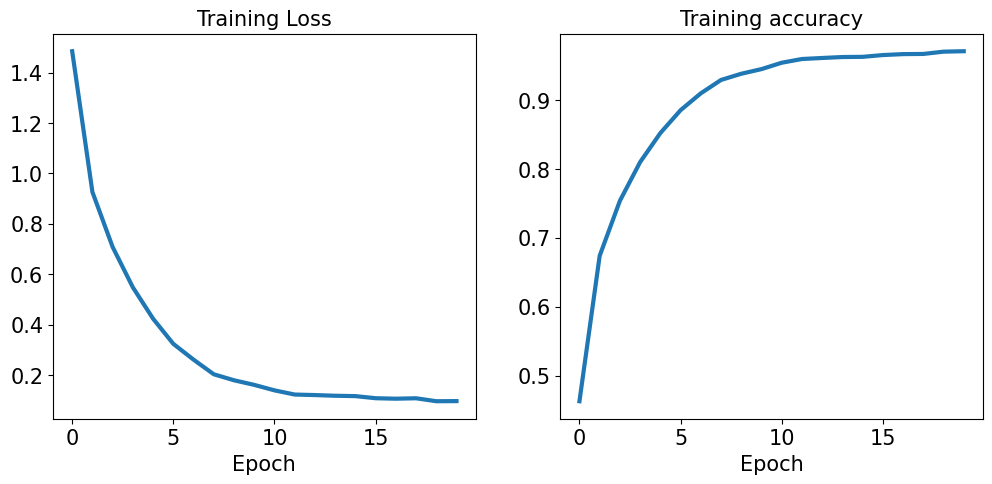

In [13]:
new_hist = []
for item in accuracy_hist:
    item = item.cpu()
    new_hist.append(item)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax = fig.add_subplot(1,2,2)
ax.plot(new_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [14]:
for x_test, y_test in test_loader:
    pred_test = model.forward(x_test)
    correct = (torch.argmax(pred_test, dim=1)==y_test).float()
    accuracy = correct.mean()
    print(f'Test Acc.: {accuracy:.4f}')
    break

Test Acc.: 0.8125
